### Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
cf.go_offline()

from plotly.subplots import make_subplots
import plotly.express as px

#### Load dataset

In [2]:
company = pd.read_csv("Company_Data.csv")

#### Read dataset

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#### EDA on dataset

In [4]:
# Check first 5 records
company.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
# Check last 5 records
company.tail(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
# Check for data types, non-null values & memory usage
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# Get central tendency, dispersion and shape of dataset’s distribution
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
# Checking Null values
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [9]:
# Check for the column labels of the DataFrame
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [10]:
# Check the dimensions of the DataFrame
company.shape

(400, 11)

In [11]:
# Check for the random sample from the DataFrame
company.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
346,8.97,132,107,0,144,125,Medium,33,13,No,No
330,4.99,122,59,0,501,112,Bad,32,14,No,No
47,4.38,126,98,0,173,108,Bad,55,16,Yes,No
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes


In [12]:
# Get count of sales amount
company.Sales.value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

#### Visualize data

In [13]:
# Check for Outliers in dataset
trace0 = go.Box(y = company['Sales'], name = 'Sales')
data = [trace0]
iplot(data)

<font size = 3 color = darkblue>There are two instances of outliers in the data.</font>

In [14]:
x = company['Sales']
print("Skewness: %f" % stats.skew(x))
print("Kurtosis: %f" % stats.kurtosis(x))

hist_data = [x]
group_labels = ['Sales'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)

fig.show()

Skewness: 0.184864
Kurtosis: -0.094833


<font size = 3 color = darkblue>Sales data is postively skewed and has negative kurtosis.</font>

In [15]:
# Get list of all columns with numerical data
num_col = company.select_dtypes(exclude = 'object').columns.tolist()

In [16]:
# Boxplot for all columns with numerical data
company.iplot(kind = 'box', keys = num_col)

#data_df = pd.DataFrame(company, columns = num_col)
#data_df

In [17]:
data = []

for i in range(0, 10):
    trace = {
            "type": 'violin',
            "x": max(company.iloc[:,i]),
            "y": company.iloc[:,i],
            "name": list(company.columns)[i],
            "box": {"visible": True},
            "meanline": {"visible": True}
        }
    data.append(trace)
        
fig = {
    "data": data,
    "layout" : {
        "title": "Violin plot of all stats",
        "yaxis": {"zeroline": False,}
    }
}

iplot(fig, filename = 'violin', validate = False)

In [18]:
# Histogram for all columns
company.iplot(kind = 'histogram', subplots = True)

#fig = ff.create_distplot([data_df[i] for i in data_df.columns], data_df.columns, curve_type = 'kde', 
#show_hist = False, show_rug = False)

#fig.show()

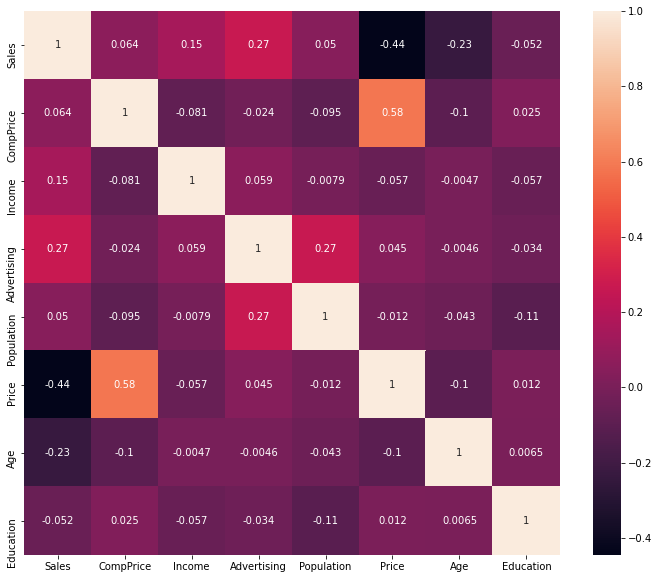

In [19]:
# Heatmap for Company data
corr = company.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot = True)

In [20]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

In [21]:
lbe = LabelEncoder()

In [22]:
company["ShelveLoc"] = lbe.fit_transform(company["ShelveLoc"])
company["Urban"] = lbe.fit_transform(company["Urban"])
company["US"] = lbe.fit_transform(company["US"])

In [23]:
# Target variable is continuous. For Decision Tree Classifier, either integer or categorical variables are required.
# So, we will convert it to categorical by considering mean value of the Sales column i.e. 7.49.
# If Sales <= 7.49, change it to 'Small' & in case > 7.49 to 'Large'.

for i in range(0, len(company["Sales"])):
    if company.Sales[i] > 7.49:
        company.Sales[i] = "Large"
    else:
        company.Sales[i] = "Small"

In [24]:
X = company.iloc[:, 1:11]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [25]:
Y = company.iloc[:, 0].values
Y

array(['Large', 'Large', 'Large', 'Small', 'Small', 'Large', 'Small',
       'Large', 'Small', 'Small', 'Large', 'Large', 'Small', 'Large',
       'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Small',
       'Large', 'Small', 'Small', 'Large', 'Large', 'Large', 'Small',
       'Small', 'Large', 'Large', 'Large', 'Small', 'Large', 'Small',
       'Large', 'Large', 'Small', 'Small', 'Small', 'Small', 'Large',
       'Large', 'Small', 'Small', 'Small', 'Large', 'Small', 'Small',
       'Large', 'Small', 'Small', 'Large', 'Small', 'Small', 'Small',
       'Large', 'Small', 'Small', 'Small', 'Large', 'Small', 'Small',
       'Large', 'Large', 'Small', 'Large', 'Large', 'Large', 'Large',
       'Large', 'Small', 'Small', 'Large', 'Small', 'Large', 'Large',
       'Large', 'Small', 'Large', 'Large', 'Large', 'Large', 'Small',
       'Small', 'Large', 'Large', 'Large', 'Small', 'Large', 'Small',
       'Small', 'Small', 'Large', 'Large', 'Small', 'Large', 'Small',
       'Large', 'Sma

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from six import StringIO
#from pydotplus import graphviz
#import pydotplus
#from PIL import Image

In [27]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [28]:
# Perform training with giniIndex
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)

# Performing training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [29]:
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

# Performing training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [30]:
# Predicton on test with giniIndex
print("Results Using Gini Index:")

y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Results Using Gini Index:
Predicted values:
['Large' 'Large' 'Small' 'Small' 'Large' 'Small' 'Large' 'Large' 'Large'
 'Small' 'Large' 'Large' 'Small' 'Large' 'Small' 'Large' 'Small' 'Large'
 'Large' 'Small' 'Large' 'Small' 'Small' 'Small' 'Large' 'Small' 'Small'
 'Small' 'Large' 'Small' 'Large' 'Small' 'Large' 'Small' 'Small' 'Small'
 'Large' 'Small' 'Small' 'Large' 'Small' 'Small' 'Large' 'Small' 'Small'
 'Large' 'Large' 'Small' 'Large' 'Small' 'Large' 'Small' 'Small' 'Large'
 'Small' 'Small' 'Large' 'Large' 'Small' 'Small' 'Large' 'Small' 'Small'
 'Small' 'Large' 'Small' 'Small' 'Large' 'Large' 'Small' 'Large' 'Small'
 'Small' 'Large' 'Large' 'Small' 'Small' 'Small' 'Small' 'Large']


In [31]:
# Calculate accuracy
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

print(" ")

print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)

print(" ")

print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix:  [[27 11]
 [ 8 34]]
 
Accuracy :  76.25
 
Report :                precision    recall  f1-score   support

       Large       0.77      0.71      0.74        38
       Small       0.76      0.81      0.78        42

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [32]:
print("Results Using Entropy:")

# Prediction using entropy
y_pred_entropy = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)

Results Using Entropy:
Predicted values:
['Large' 'Large' 'Small' 'Small' 'Large' 'Small' 'Large' 'Large' 'Large'
 'Small' 'Large' 'Large' 'Small' 'Large' 'Small' 'Large' 'Small' 'Large'
 'Large' 'Small' 'Large' 'Small' 'Small' 'Small' 'Large' 'Small' 'Small'
 'Small' 'Large' 'Small' 'Large' 'Small' 'Large' 'Small' 'Small' 'Small'
 'Large' 'Small' 'Small' 'Large' 'Small' 'Small' 'Large' 'Small' 'Small'
 'Large' 'Large' 'Small' 'Large' 'Small' 'Large' 'Small' 'Small' 'Large'
 'Small' 'Small' 'Large' 'Large' 'Small' 'Small' 'Large' 'Small' 'Small'
 'Small' 'Large' 'Small' 'Small' 'Large' 'Large' 'Small' 'Large' 'Small'
 'Small' 'Large' 'Large' 'Small' 'Small' 'Small' 'Small' 'Large']


In [33]:
# Calculate accuracy
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_entropy))

print(" ")

print("Accuracy : ", accuracy_score(y_test, y_pred_entropy) * 100)

print(" ")

print("Report : ", classification_report(y_test, y_pred_entropy))

Confusion Matrix:  [[29  9]
 [10 32]]
 
Accuracy :  76.25
 
Report :                precision    recall  f1-score   support

       Large       0.74      0.76      0.75        38
       Small       0.78      0.76      0.77        42

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [34]:
text_rep_gini = tree.export_text(clf_gini)
print(text_rep_gini)

|--- feature_4 <= 101.50
|   |--- feature_6 <= 68.50
|   |   |--- feature_0 <= 118.50
|   |   |   |--- class: Large
|   |   |--- feature_0 >  118.50
|   |   |   |--- class: Large
|   |--- feature_6 >  68.50
|   |   |--- feature_1 <= 80.00
|   |   |   |--- class: Small
|   |   |--- feature_1 >  80.00
|   |   |   |--- class: Large
|--- feature_4 >  101.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_2 <= 14.00
|   |   |   |--- class: Small
|   |   |--- feature_2 >  14.00
|   |   |   |--- class: Small
|   |--- feature_5 >  0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- class: Large
|   |   |--- feature_5 >  1.50
|   |   |   |--- class: Small



In [35]:
text_rep_entropy = tree.export_text(clf_entropy)
print(text_rep_entropy)

|--- feature_4 <= 101.50
|   |--- feature_0 <= 124.00
|   |   |--- feature_4 <= 86.50
|   |   |   |--- class: Large
|   |   |--- feature_4 >  86.50
|   |   |   |--- class: Large
|   |--- feature_0 >  124.00
|   |   |--- class: Large
|--- feature_4 >  101.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_4 <= 129.50
|   |   |   |--- class: Small
|   |   |--- feature_4 >  129.50
|   |   |   |--- class: Small
|   |--- feature_5 >  0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- class: Large
|   |   |--- feature_5 >  1.50
|   |   |   |--- class: Small



In [36]:
#dot_data = StringIO()

#tree.export_graphviz(clf_gini, out_file = dot_data, filled = True, rounded = True, special_characters = True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('Company_Data1.png')

#Image.open('Company_Data1.png')

In [37]:
#dot_data = StringIO()

#tree.export_graphviz(clf_entropy, out_file = dot_data, filled = True, rounded = True, special_characters = True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('Company_Data2.png')

#Image.open('Company_Data2.png')

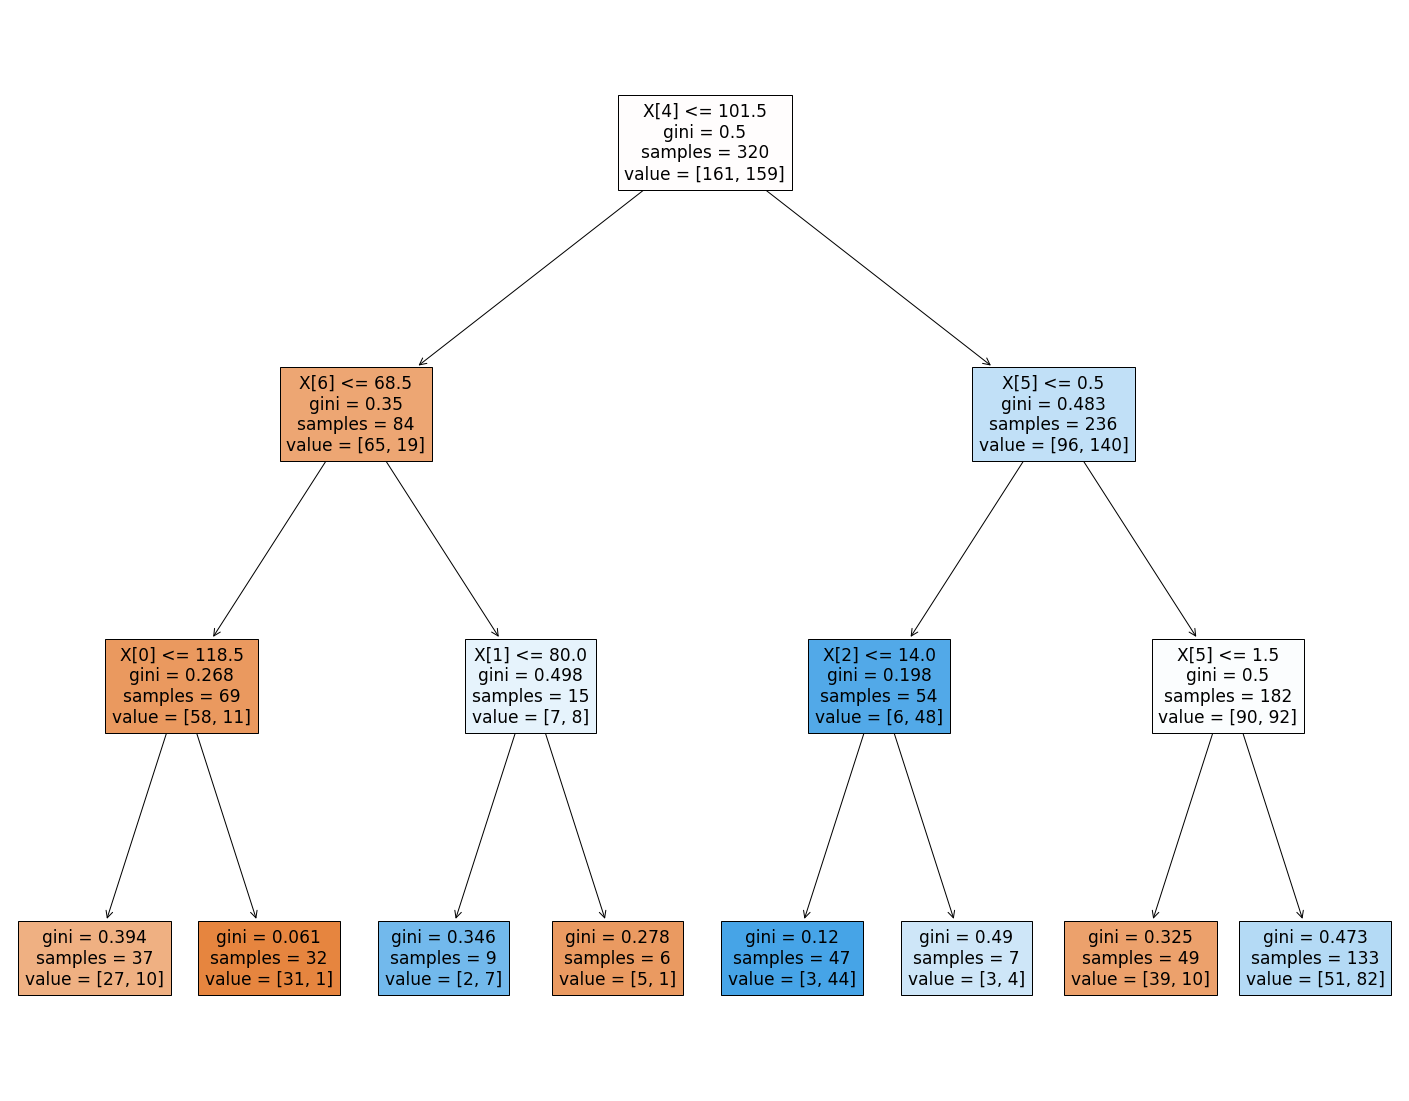

In [38]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_gini, filled = True)

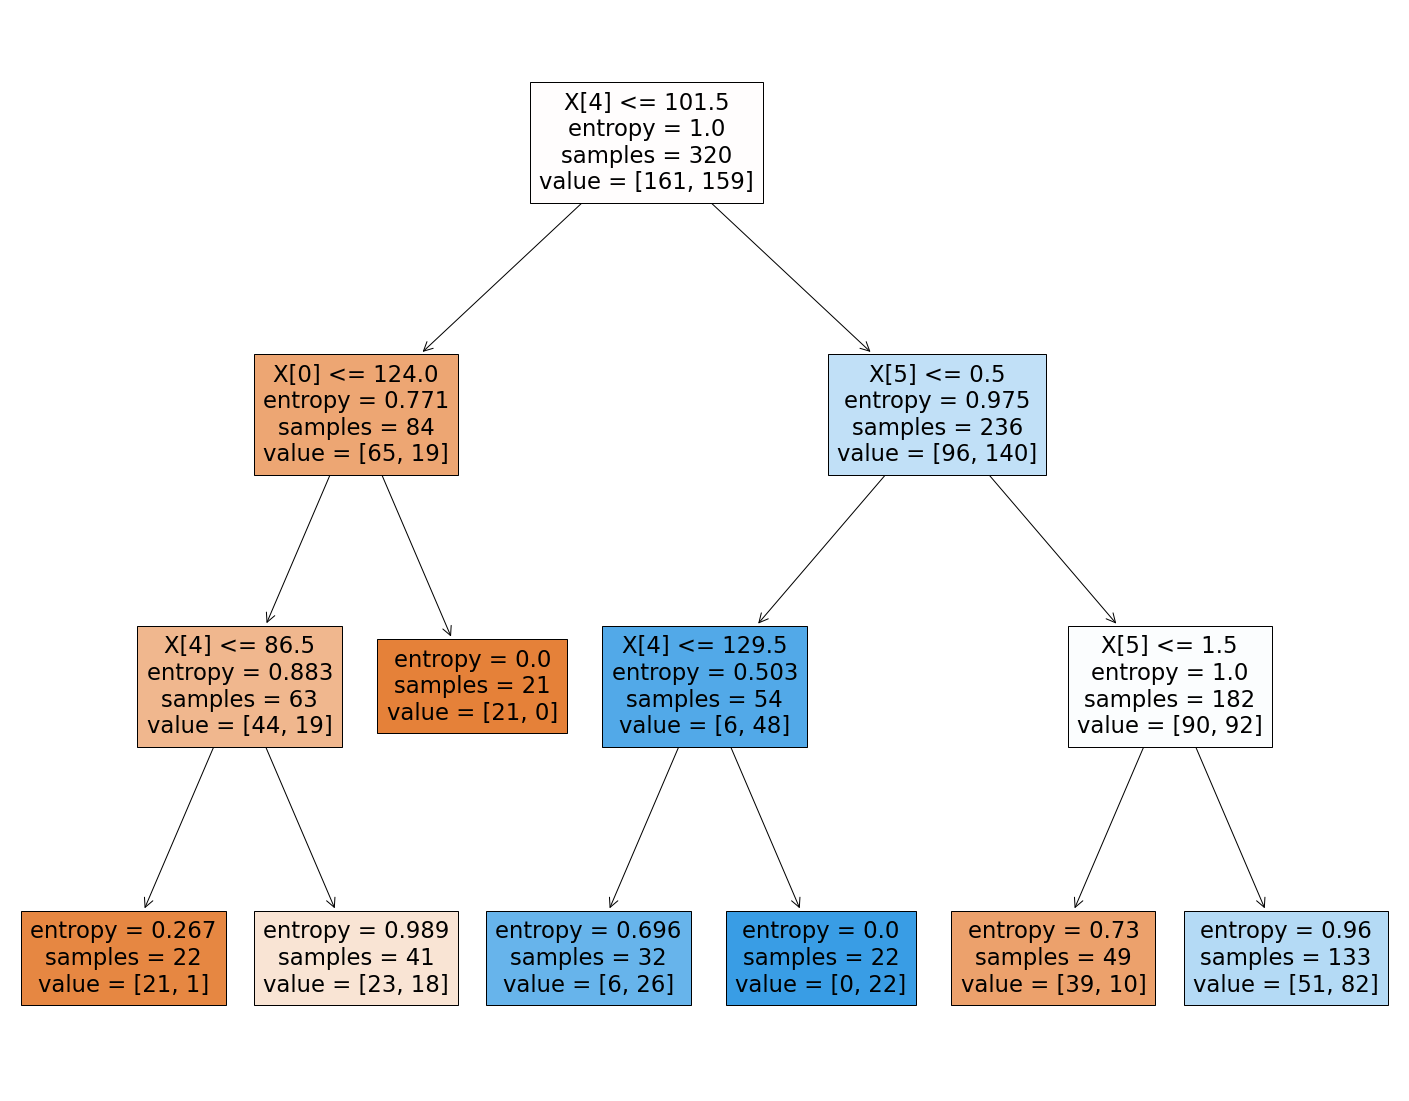

In [39]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_entropy, filled = True)

In [40]:
#import graphviz

# DOT data
#dot_data = tree.export_graphviz(clf_gini, out_file = None, filled = True)

# Draw graph
#graph = graphviz.Source(dot_data, format = "png")
#graph

In [41]:
#import graphviz

# DOT data
#dot_data = tree.export_graphviz(clf_entropy, out_file = None, filled = True)

# Draw graph
#graph = graphviz.Source(dot_data, format = "png")
#graph